# Testing dummy camera geometry display

- 650 mm, 5 rafts, 15 CCDs, 8x15 amplis
- 1 raft = 130.000 mm
- 1 CCD = 43.333 mm
- 1 Ampli = 5.4125 mm x 21.665 mm

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

In [2]:
raft_x = np.arange(-325, 455, 130)
raft_y = np.arange(-325, 455, 130)
ccd_x = np.arange(-325, 370, 43.333)
ccd_y = np.arange(-325, 370, 43.333)
amp_x = np.arange(-325, 330, 5.4125)
amp_y = np.arange(-325, 350, 21.665)

In [3]:
print('Rafts')
print(raft_x, raft_y)
print('CCDs')
print(ccd_x, ccd_y)
print('Amps')
print(amp_x, amp_y)

Rafts
[-325 -195  -65   65  195  325] [-325 -195  -65   65  195  325]
CCDs
[-325.    -281.667 -238.334 -195.001 -151.668 -108.335  -65.002  -21.669
   21.664   64.997  108.33   151.663  194.996  238.329  281.662  324.995
  368.328] [-325.    -281.667 -238.334 -195.001 -151.668 -108.335  -65.002  -21.669
   21.664   64.997  108.33   151.663  194.996  238.329  281.662  324.995
  368.328]
Amps
[-3.250000e+02 -3.195875e+02 -3.141750e+02 -3.087625e+02 -3.033500e+02
 -2.979375e+02 -2.925250e+02 -2.871125e+02 -2.817000e+02 -2.762875e+02
 -2.708750e+02 -2.654625e+02 -2.600500e+02 -2.546375e+02 -2.492250e+02
 -2.438125e+02 -2.384000e+02 -2.329875e+02 -2.275750e+02 -2.221625e+02
 -2.167500e+02 -2.113375e+02 -2.059250e+02 -2.005125e+02 -1.951000e+02
 -1.896875e+02 -1.842750e+02 -1.788625e+02 -1.734500e+02 -1.680375e+02
 -1.626250e+02 -1.572125e+02 -1.518000e+02 -1.463875e+02 -1.409750e+02
 -1.355625e+02 -1.301500e+02 -1.247375e+02 -1.193250e+02 -1.139125e+02
 -1.085000e+02 -1.030875e+02 -9.767500

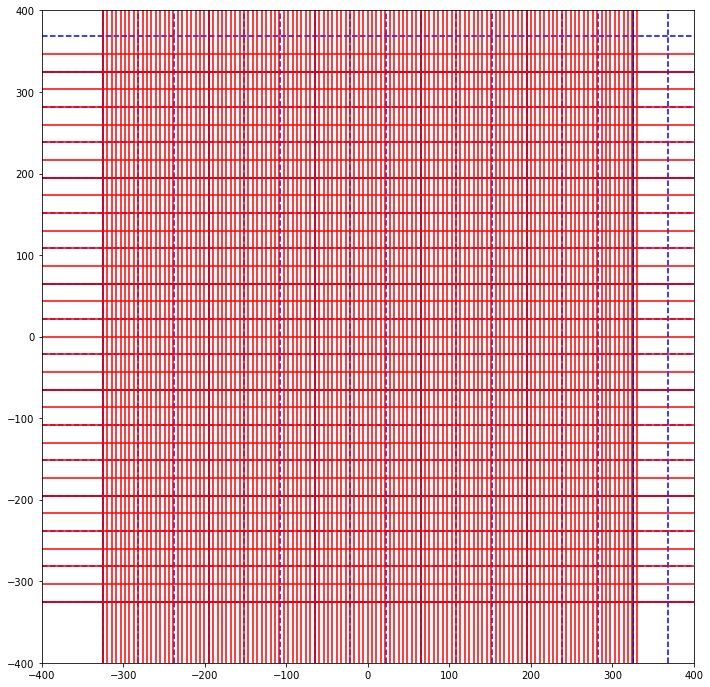

In [4]:
plt.subplots(figsize=(12,12))
for rx in raft_x:
    plt.axvline(x=rx, color="black", linestyle="-")
for ry in raft_y:
    plt.axhline(y=ry, color="black", linestyle="-")
for rx in ccd_x:
    plt.axvline(x=rx, color="blue", linestyle="--")
for ry in ccd_y:
    plt.axhline(y=ry, color="blue", linestyle="--")
for rx in amp_x:
    plt.axvline(x=rx, color="red", linestyle="-")
for ry in amp_y:
    plt.axhline(y=ry, color="red", linestyle="-")
    
plt.ylim([-400, 400])
plt.xlim([-400, 400])
plt.gca().set_aspect('equal')

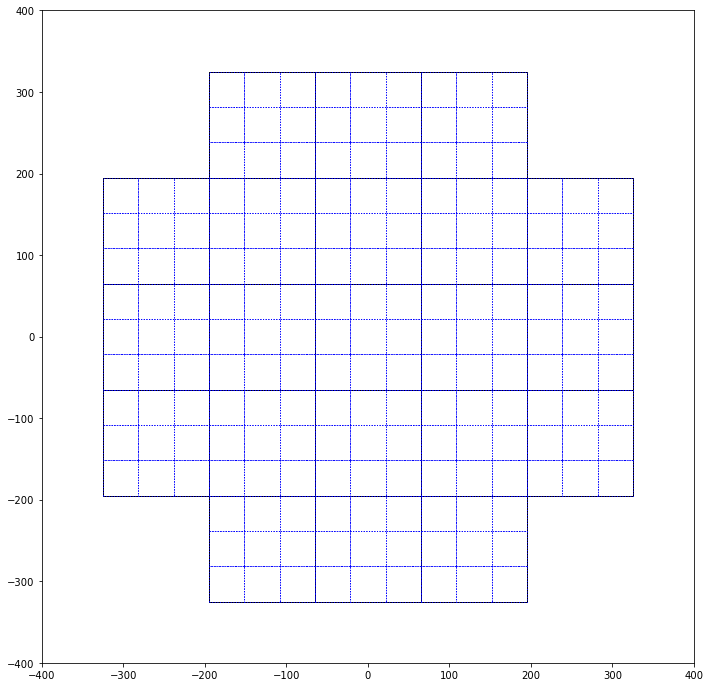

In [5]:
raft_x = np.arange(-325, 325, 130)
raft_y = np.arange(-325, 325, 130)
ccd_x = np.arange(-325, 325, 43.333)
ccd_y = np.arange(-325, 325, 43.333)
amp_x = np.arange(-325, 325, 5.4125)
amp_y = np.arange(-325, 325, 21.665)

def make_raft(x, y):
    return Rectangle((x, y), 130, 130)

def make_ccd(x, y):
    return Rectangle((x, y), 5.4125, 21.665)

def make_amp(x, y):
    return Rectangle((x, y), 43.333, 43.333)

def make_raft_with_ccd(x, y):
    raft = []
    ccd_x = np.arange(x, x+129, 43.333)
    ccd_y = np.arange(y, y+129, 43.333)
    for rx in ccd_x:
        for ry in ccd_y:
            raft.append(make_ccd(rx, ry))
    return raft

# Create figure and axes
fig, ax = plt.subplots(1, figsize=(12,12))
plt.ylim([-400, 400])
plt.xlim([-400, 400])
rafts = []
ccds = []

# line 1
for rx in raft_x[1:4]:
    rafts.append(make_raft(rx, raft_y[0]))
    ccds.extend(make_raft_with_ccd(rx, raft_y[0]))
# line 2
for rx in raft_x:
    rafts.append(make_raft(rx, raft_y[1]))
    ccds.extend(make_raft_with_ccd(rx, raft_y[1]))
# line 3
for rx in raft_x:
    rafts.append(make_raft(rx, raft_y[2]))
    ccds.extend(make_raft_with_ccd(rx, raft_y[2]))
# line 4
for rx in raft_x:
    rafts.append(make_raft(rx, raft_y[3]))
    ccds.extend(make_raft_with_ccd(rx, raft_y[3]))
# line 5
for rx in raft_x[1:4]:
    rafts.append(make_raft(rx, raft_y[4]))
    ccds.extend(make_raft_with_ccd(rx, raft_y[4]))   
    
rafts_col = PatchCollection(rafts, facecolor='none', edgecolor='black')
ax.add_collection(rafts_col)
ccds_col = PatchCollection(ccds, facecolor='none', edgecolor='blue', linestyle='dotted')
ax.add_collection(ccds_col)

plt.gca().set_aspect('equal')